In [5]:
# imports/config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 12]

In [13]:
# plot firefox configed as histogram and boxplot
def plot_firefox_configed(data_set: pd.DataFrame,data_set_configed: pd.DataFrame, out: str):

    u = list(data_set_configed['isolated_resist'].unique())
    u.sort()
    u = [round(x,5) for x in u]
    u = list(dict.fromkeys(u))

    isolated = data_set['browser_isolated'].to_numpy()
    unisolated = data_set['browser_unisolated'].to_numpy()

    isolated_resist = data_set_configed['isolated_resist'].to_numpy()
    unisolated_resist = data_set_configed['unisolated_resist'].to_numpy()

    isolated_resist_20ms = data_set_configed['isolated_resist_20ms'].to_numpy()
    unisolated_resist_20ms = data_set_configed['unisolated_resist_20ms'].to_numpy()

    unisolated_resist_33ms = data_set_configed['unisolated_resist_33ms'].to_numpy()

    isolated_resist_40ms = data_set_configed['isolated_resist_40ms'].to_numpy()
    unisolated_resist_40ms = data_set_configed['unisolated_resist_40ms'].to_numpy()

    unisolated_resist_60ms = data_set_configed['unisolated_resist_60ms'].to_numpy()

    unisolated_resist_80ms = data_set_configed['unisolated_resist_80ms'].to_numpy()

    
    assert len(isolated_resist) == len(unisolated_resist)
    data_len = len(isolated_resist)

    # throw away outlier (the lower and upper 5%)
    ten_perc = int(data_len * 0.05)

# isolated
    isolated.sort()
    isolated = isolated[ten_perc:-ten_perc]
    isolated_len = len(isolated)
    isolated_min = isolated.min()
    isolated_max = isolated.max()
# unisolated
    unisolated.sort()
    unisolated = unisolated[ten_perc:-ten_perc]
    unisolated_len = len(unisolated)
    unisolated_min = unisolated.min()
    unisolated_max = unisolated.max()

# isolated_resist
    isolated_resist.sort()
    isolated_resist = isolated_resist[ten_perc:-ten_perc]
    isolated_resist_len = len(isolated_resist)
    isolated_resist_min = isolated_resist.min()
    isolated_resist_max = isolated_resist.max()
# unisolated_resist
    unisolated_resist.sort()
    unisolated_resist = unisolated_resist[ten_perc:-ten_perc]
    unisolated_resist_len = len(unisolated_resist)
    unisolated_resist_min = unisolated_resist.min()
    unisolated_resist_max = unisolated_resist.max()



    min = np.array([
        isolated_min,                       unisolated_min, 
        isolated_resist_min,                unisolated_resist_min,

    ]).min()
    max = np.array([
        isolated_max,                       unisolated_max, 
        isolated_resist_max,                unisolated_resist_max,

    ]).max()

    assert isolated_len ==                      unisolated_len \
        == isolated_resist_len ==               unisolated_resist_len \

    bins = np.arange(round(min, 2) - 1, round(max, 2) + 1, step=0.01)
    bins = np.arange(10, 180) - 0.5

    #
    ticks = np.arange(10,181, 10).tolist()
    ticks += [83,116, 65, 135]
    
    # plot as histogram
    #plt.hist(x=isolated,              alpha=1, rwidth=0.2 , label="Isolated"                                , )#bins=bins)
    #plt.hist(x=unisolated,            alpha=1, rwidth=0.2 , label="Unisolated"                              , )#bins=bins)
    plt.hist(x=unisolated_resist,      alpha=0.8, rwidth=1.0 , label="Unisolated resistFingerprinting 16.667ms", bins=np.arange(40, 180) - 0.5)
    plt.hist(x=unisolated_resist_20ms, alpha=0.8, rwidth=0.8 , label="Unisolated resistFingerprinting 20ms"    , bins=np.arange(40, 180) - 0.5)
    plt.hist(x=unisolated_resist_33ms, alpha=0.6, rwidth=0.6 , label="Unisolated resistFingerprinting 33.33ms" , bins=np.arange(40, 180) - 0.5)
    plt.hist(x=unisolated_resist_40ms, alpha=0.6, rwidth=0.6 , label="Unisolated resistFingerprinting 40ms"    , bins=np.arange(40, 180) - 0.5)
    plt.hist(x=unisolated_resist_60ms, alpha=0.6, rwidth=0.6 , label="Unisolated resistFingerprinting 60ms"    , bins=np.arange(40, 180) - 0.5)
    plt.hist(x=unisolated_resist_80ms, alpha=0.6, rwidth=0.6 , label="Unisolated resistFingerprinting 80ms"    , bins=np.arange(40, 180) - 0.5)

    plt.grid(axis='y', alpha=0.5)
    plt.title('Timestamp samples (target: 100ms)')
    plt.ylabel('Number of Occurrences')
    plt.xlabel('Distance to last Timestamp (ms)')
    plt.xticks(ticks=ticks, fontsize=14, )#rotation=75)
    plt.tight_layout()
    plt.legend()
    plt.savefig(out, bbox_inches="tight", pad_inches=0.3)
    plt.show()

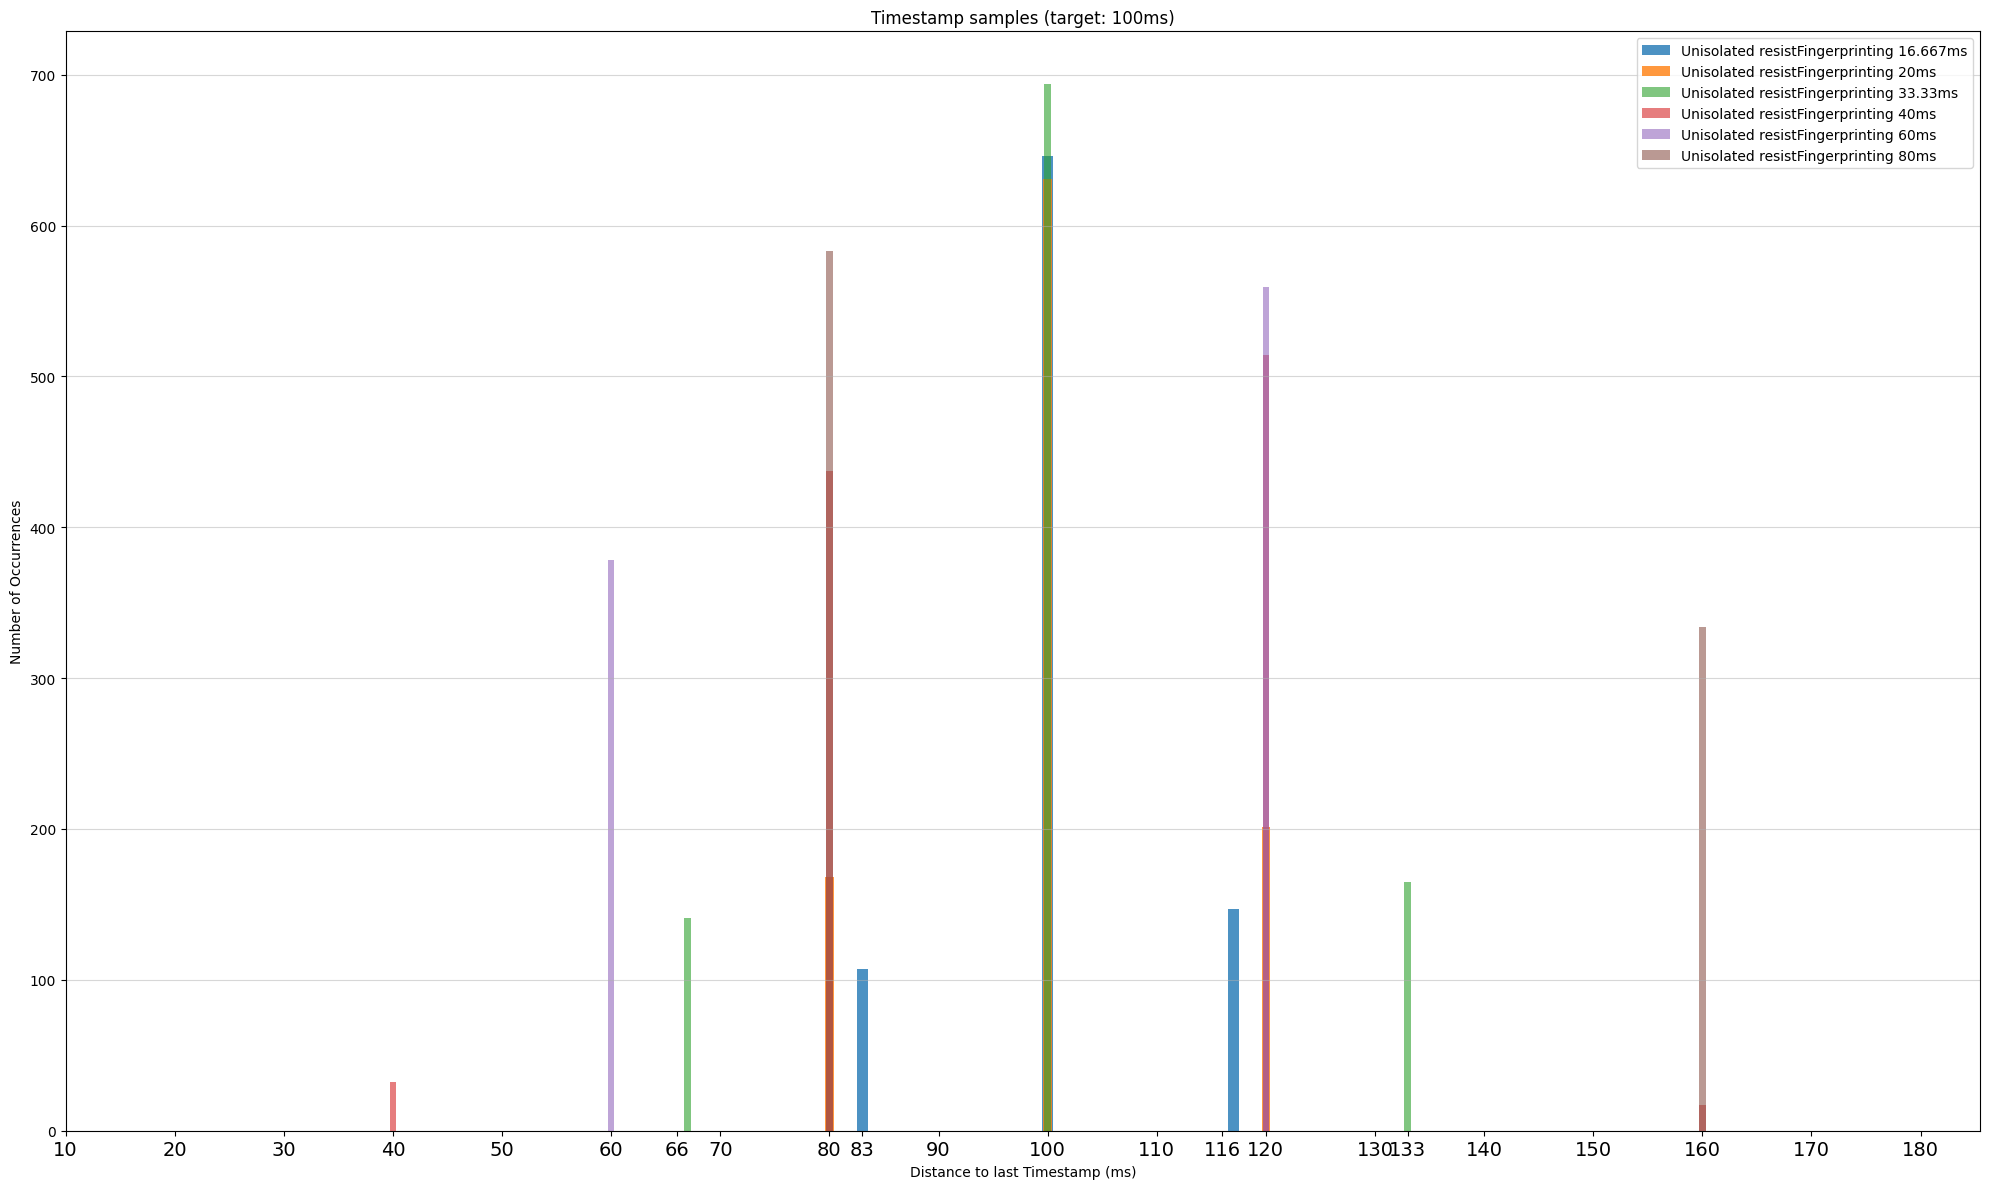

In [15]:
# firefox resistFP
firefox = pd.read_csv("./firefox/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
firefox_config = pd.read_csv("./firefox_rf/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
plot_firefox_configed(firefox,firefox_config, "./firefox_rf/hist.jpg")